In [89]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [90]:
animals=pd.read_csv('Animals2.csv')
animals

,Unnamed: 0,body,brain
0,Lesser short-tailed shrew,0.5,0.14
1,Little brown bat,1.0,0.25
2,Big brown bat,2.3,0.30
3,Mouse,2.3,0.40
4,Musk shrew,4.8,0.33
...,...,...,...
60,Asian elephant,254700.0,4603.00
61,African elephant,665400.0,5712.00
62,Triceratops,940000.0,70.00
63,Dipliodocus,1170000.0,50.00


<AxesSubplot:xlabel='body', ylabel='brain'>

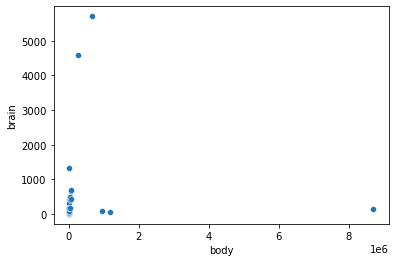

In [91]:
sns.scatterplot(x="body",y="brain",data=animals)

In [92]:
body1=np.log(animals['body'])
brain1=np.log(animals['brain'])

Text(0, 0.5, 'ln(brain)')

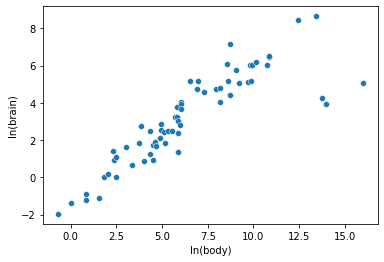

In [93]:
sns.scatterplot(x=body1,y=brain1)
plt.xlabel("ln(body)")
plt.ylabel("ln(brain)")

Text(336.9714285714286, 0.5, 'ln(brain)')

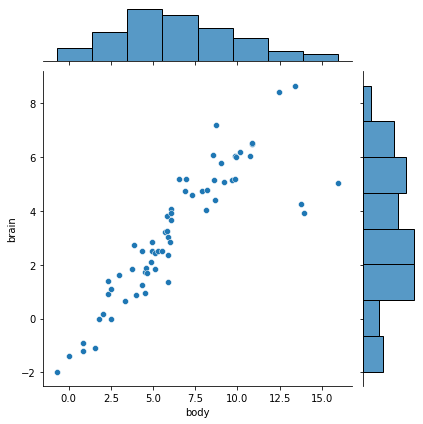

In [94]:
sns.jointplot(x=body1,y=brain1)
plt.xlabel("ln(body)")
plt.ylabel("ln(brain)")

In [95]:
stats.pearsonr(body1,brain1)

(0.875309238556917, 1.5029489604419077e-21)

In [96]:
DF=pd.concat([body1,brain1],axis='columns')
print(DF)

         body     brain
0   -0.693147 -1.966113
1    0.000000 -1.386294
2    0.832909 -1.203973
3    0.832909 -0.916291
4    1.568616 -1.108663
..        ...       ...
60  12.447842  8.434464
61  13.408144  8.650325
62  13.753635  4.248495
63  13.972514  3.912023
64  15.978834  5.040194

[65 rows x 2 columns]


In [97]:
#fit the simple linear regression model
model2=ols('brain1~body1',DF)
results2=model2.fit()
print(results2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.762   
Dependent Variable: brain1           AIC:                207.1072
Date:               2022-03-16 06:38 BIC:                211.4559
No. Observations:   65               Log-Likelihood:     -101.55 
Df Model:           1                F-statistic:        206.4   
Df Residuals:       63               Prob (F-statistic): 1.50e-21
R-squared:          0.766            Scale:              1.3745  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -0.5524    0.2988  -1.8484  0.0692  -1.1495  0.0448
body1           0.5915    0.0412  14.3674  0.0000   0.5092  0.6738
-----------------------------------------------------------------
Omnibus:              21.364       Durbin-Watson:          0.811 
Prob(Omnibus):        

C:\Users\nabil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


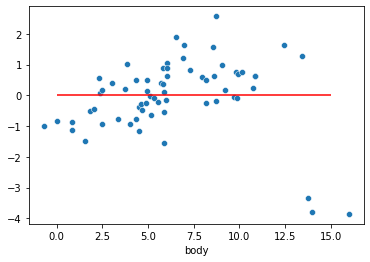

In [98]:
# Calculate the predcitions based on the model
y_pred=-0.5524+0.5915*body1
y_value=brain1
error=y_value-y_pred
sns.scatterplot(body1,error)
plt.hlines(0,0,15,color='red')

0    -0.962397
1    -0.552400
2    -0.059734
3    -0.059734
4     0.375436
        ...   
60    6.810498
61    7.378517
62    7.582875
63    7.712342
64    8.899080
Name: body, Length: 65, dtype: float64


C:\Users\nabil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'ln(brain)')

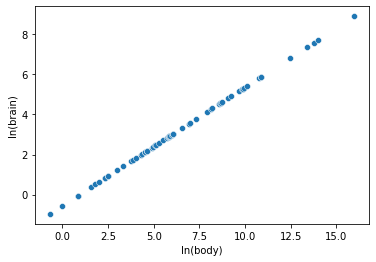

In [99]:
print(y_pred)
sns.scatterplot(body1,y_pred)
plt.xlabel("ln(body)")
plt.ylabel("ln(brain)")

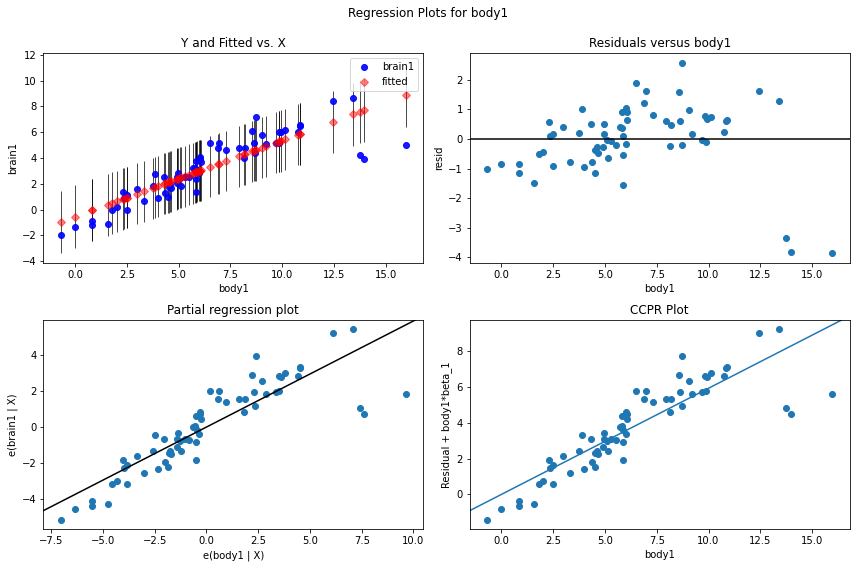

In [100]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results2,'body1',fig=fig)

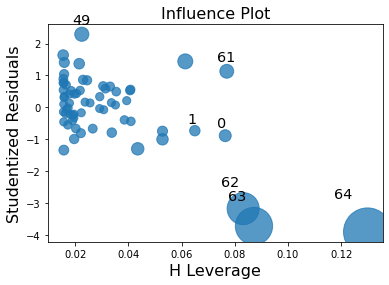

In [101]:
fig=sm.graphics.influence_plot(results2,criterion='cooks')

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


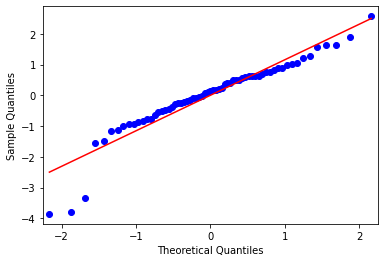

In [102]:
sm.qqplot(results2.resid,line='s')
plt.show()

In [103]:
stats.shapiro(results2.resid)

ShapiroResult(statistic=0.9121341705322266, pvalue=0.00021153483248781413)

C:\Users\nabil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'ln(brain)')

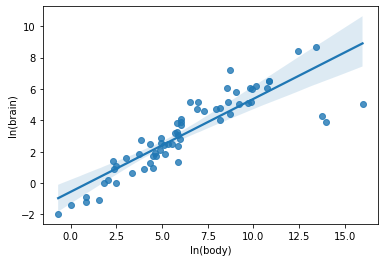

In [104]:
sns.regplot(body1,brain1,DF)
plt.xlabel("ln(body)")
plt.ylabel("ln(brain)")